# **Titanic 데이터분석**

### Features 변수명 설명
- survival(생존여부) :Survival (0 = No; 1 = Yes)
- pclass(승객 등급): Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name(이름): Name
- sex(성별): Sex
- age(나이): Age
- sibsp(함께 탑승한 형제 또는 배우자 수): Number of Siblings/Spouses Aboard
- parch(함께 탑승한 부모 또는 자녀 수): Number of Parents/Children Aboard
- ticket(티켓번호): Ticket Number
- fare(요금): Passenger Fare
- cabin(선실 번호)
- embarked(탑승장소): Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
# 데이터 가져오기
!gdown 1KmHoOEZVcmL65cc6defyo3xTq8NmYY8J

Downloading...
From: https://drive.google.com/uc?id=1KmHoOEZVcmL65cc6defyo3xTq8NmYY8J
To: /content/titanic.csv
100% 61.2k/61.2k [00:00<00:00, 43.2MB/s]


## 1. package import

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Dataset 불러오기

In [49]:
df = pd.read_csv("titanic.csv")     # ...코드 입력
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Data 확인하기

In [51]:
# 데이터프레임의 행과 열 갯수 확인
df.shape     # ...코드 입력

(891, 12)

In [52]:
# 전반적인 데이터프레임의 정보 확인
df.info()     # ...코드 입력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
# 기본 통계치 확인
df.describe()     # ...코드 입력

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Feature Data 탐색

In [54]:
# value_counts로 Pclass의 각 값의 갯수를 확인
Pclass_vc = df["Pclass"].value_counts()     # ...코드 입력
print(Pclass_vc)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [55]:
# 데이터프레임에서 한개의 열을 선택시 데이터클래스 확인 -> 시리즈
df_pclass = df['Pclass']
print(type(df_pclass))

<class 'pandas.core.series.Series'>


In [56]:
# values_counts로 'Sex'의 각 값의 갯수를 확인
Sex_vc = df['Sex'].value_counts()
print(Sex_vc)

Sex
male      577
female    314
Name: count, dtype: int64


## 5. DataFrame의 컬럼 데이터 엑세스

In [57]:
# Family_No 열을 생성하고 여성과 아이 승객을 합해 남자 본인을 합하여 가족수 생성
df['Family_No'] = df['SibSp'] + df['Parch'] + 1     # ...코드 입력
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


## 6. DataFrame 데이터 삭제

In [58]:
# 'Family_No' 열을 삭제하기 axis=1, inplace=True 적용
drop_result = df.drop(['Family_No'], axis=1, inplace=True)

# 'Family_No' 컬럼 항목 삭제되었는지 확인하기 판다스 info() 사용
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 7.  데이터 셀렉션 및 필터링

In [59]:
# 두개 이상의 열만 선택하여 보기 -> 데이터프레임
df1 = df[["Survived", "Pclass"]] # 코드 입력
df1.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [62]:
# 불리언 인덱싱으로 3등급 데이터만 보기
pclass3_df = df[df["Pclass"] ==3] # 코드 입력
pclass3_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [67]:
# 나이 60 이상의 승객을 df_age60에 넣고 실행하기
df_age60 = df[df["Age"] >= 60] # 코드 입력
print(type(df_age60))
df_age60

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C


In [68]:
# 60이상의 승객 중 'Name', 'Age'  열만 선택해서 데이터프레임 반환
df_age60_nameAge = df_age60[["Name", "Age"]] # 코드 입력
df_age60_nameAge

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0
116,"Connors, Mr. Patrick",70.5
170,"Van der hoef, Mr. Wyckoff",61.0
252,"Stead, Mr. William Thomas",62.0
275,"Andrews, Miss. Kornelia Theodosia",63.0
280,"Duane, Mr. Frank",65.0
326,"Nysveen, Mr. Johan Hansen",61.0
366,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",60.0


In [70]:
# 60이상의 나이와 1등급, 성이 여성만의 승객만 보기
df_age60[(df_age60["Pclass"] == 1) & (df_age60["Sex"] == "female")] # 코드 입력

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


In [72]:
# 60이상의 나이와 1등급, 성이 여성만의 승객만 보기
# 시리즈 불리언으로 저장하고 이를 합쳐서 보기
cond1 = df["Age"] >= 60 # 코드 입력
cond2 = df["Pclass"] == 1 # 코드 입력
cond3 = df["Sex"] == "female" # 코드 입력

In [73]:
# 60이상의 나이와 1등급, 성이 여성만의 승객만 보기
df[(cond1) & (cond2) & (cond3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


## 8. 정렬, Aggregation , GroupBy

#### 8-1 sort_values 함수 적용

In [75]:
# 'Name' 열에서 이름으로 정렬하기
df_sorted = df.sort_values(by=['Name']) # 코드 입력
df_sorted.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.00,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C


In [76]:
# 'Pclass'와 Name'으로 내림차순으로 정렬, ascending=False
df_sorted = df.sort_values(by=['Pclass', 'Name'], ascending=False)
df_sorted.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5,NaN,S
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5,NaN,S
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4,NaN,S


#### 8-2 count, sum 등 Aggregation 함수 적용

In [78]:
# count 메서드로 데이터 갯수 세기
df.count() # 코드 입력

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [86]:
# 'Age'와 'Fare' 열의 평균값
print(f"Age\t{df['Age'].mean():.6f}") # 코드 입력
print(f"Fare\t{df['Fare'].mean():.6f}") # 코드 입력

Age	29.699118
Fare	32.204208


#### 8-3 groupby( ) 적용

In [87]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [88]:
# 'Pclass'로 그룹짓기후에 'PassengerId'와 'Survived' 열의 values만 카운팅하기
df_groupby = df.groupby('Pclass')[['PassengerId', 'Survived']].count()
df_groupby

,PassengerId,Survived
Pclass,,
1,216,216
2,184,184
3,491,491


In [89]:
# 'Pclass' 별 'Age'의 최대, 최솟값 구하기
df.groupby('Pclass')['Age'].agg([max, min])

,max,min
Pclass,,
1,80.0,0.92
2,70.0,0.67
3,74.0,0.42


In [90]:
# 딕셔너리로 행과 열 인덱스 부여하기
agg_format = {'Age':'max', 'SibSp':'sum', 'Fare':'mean'}
df.groupby('Pclass').agg(agg_format)

,Age,SibSp,Fare
Pclass,,,
1,80.0,90,84.154687
2,70.0,74,20.662183
3,74.0,302,13.675550


## 9.  결측 데이터 처리하기
#### 9-1 isna( )로 결손 데이터 확인

In [92]:
# isna() 메서드로 불리언 데이터프레임 생성, True는 결측치
df.isna().head() # 코드 입력

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [93]:
# sum()으로 결측치 갯수 합계보기
df.isna( ).sum( )

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 9-2 fillna( ) 로 Missing 데이터 대체하기

In [94]:
# 'Cabin' 열에 결측치에 C123 채우기
df['Cabin'] = df['Cabin'].fillna("C123") # 코드 입력
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C123,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


In [95]:
# 'Age' 열의 결측치에 mean 값 채우기
df['Age'] = df['Age'].fillna(df["Age"].mean()) # 코드 입력

In [96]:
# 'Embarked'' 열의 결측치에 문자열 'S' 채우기
df['Embarked'] = df['Embarked'].fillna("S") # 코드 입력

In [98]:
# isna()의 sum 으로 결측치 확인
df.isna( ).sum( ) # 코드 입력

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 10. apply, lambda로 데이터 가공

In [101]:
# 'Name_len' 열을 생성하고, 'Name'의 문자열 길이를 넣기
df['Name_len']= df['Name'].apply(lambda x: len(x))
df[['Name','Name_len']].head()

,Name,Name_len
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,"Allen, Mr. William Henry",24


In [102]:
#' 'Child_Adult' 열을 생성하고 Child를 넣어주고, 만약 15세 이상이면 Adult 문자열 삽입
df['Child_Adult'] = df['Age'].apply(lambda x: 'Child' if x <=15 else 'Adult' )
df[['Age','Child_Adult']].head(10)

,Age,Child_Adult
0,22.000000,Adult
1,38.000000,Adult
2,26.000000,Adult
3,35.000000,Adult
4,35.000000,Adult
5,29.699118,Adult
6,54.000000,Adult
7,2.000000,Child
8,27.000000,Adult
9,14.000000,Child


In [103]:
# 'Age_Cat' 열을 생성하고 15세 이상은 "adult", 15세 이하는 "Child", 60세 이상은 "Elderly" 채우기
df['Age_cat'] = df['Age'].apply(lambda x: 'Child' if x <= 15 else ('Adult' if x <= 60 else 'Elderly'))

In [104]:
# value_counts()로 갯수 확인
df['Age_cat'].value_counts()

Age_cat
Adult      786
Child       83
Elderly     22
Name: count, dtype: int64

In [105]:
import matplotlib as mpl
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

### 생존자가 얼마일까

In [106]:
!pip install koreanize-matplotlib

import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 17.0 MB/s eta 0:00:00


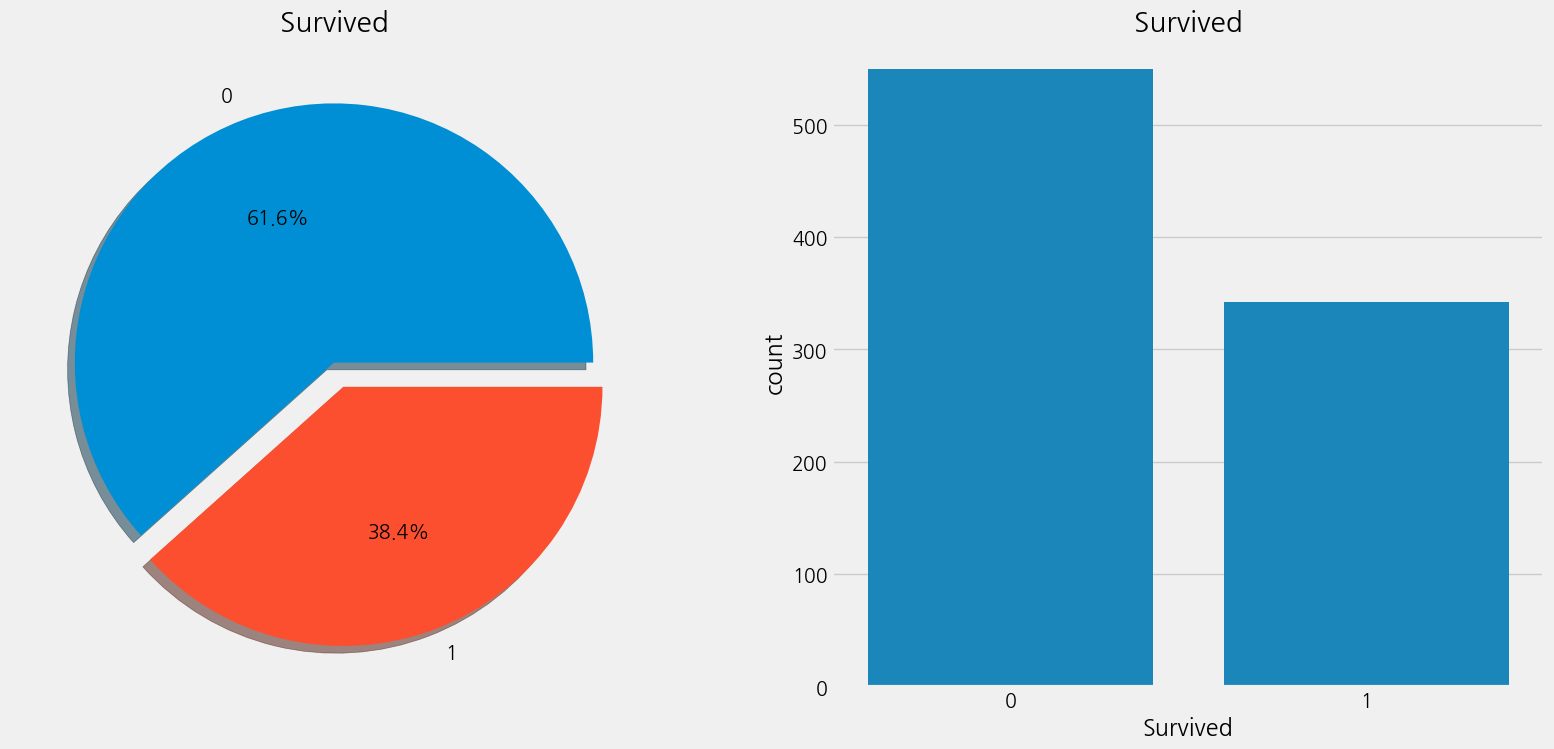

In [109]:
# 표 2개를 한 이미지에 위치 시키기 위해 좌표로 나눠줌 (1즐, 2칸, 크기=(18, 8))
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=df, ax=ax[1])  # 수정된 부분
ax[1].set_title('Survived')
plt.show()

## 데이터 특징분석

## 성별--> Categorical Feature

In [110]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

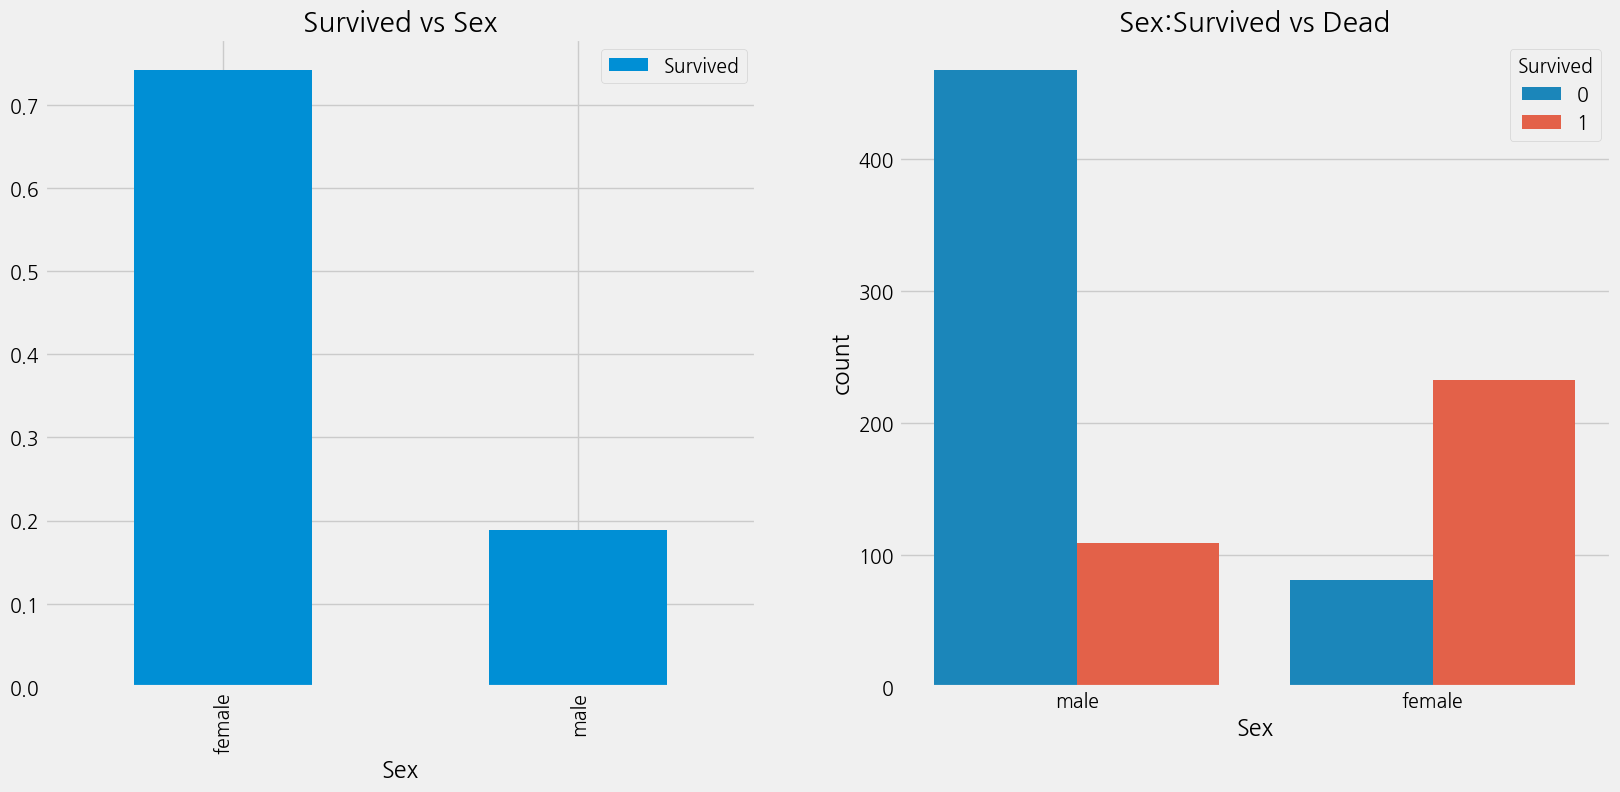

In [111]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# 생존률을 0, 1인 Survived의 값의 평균으로 구함
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

# hue='Survived'는 분할 기준임
sns.countplot(x = 'Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

## Pclass --> Ordinal Feature

In [115]:
# margins=True는 총합 부분을 표시할시 여부를 나타냄
pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


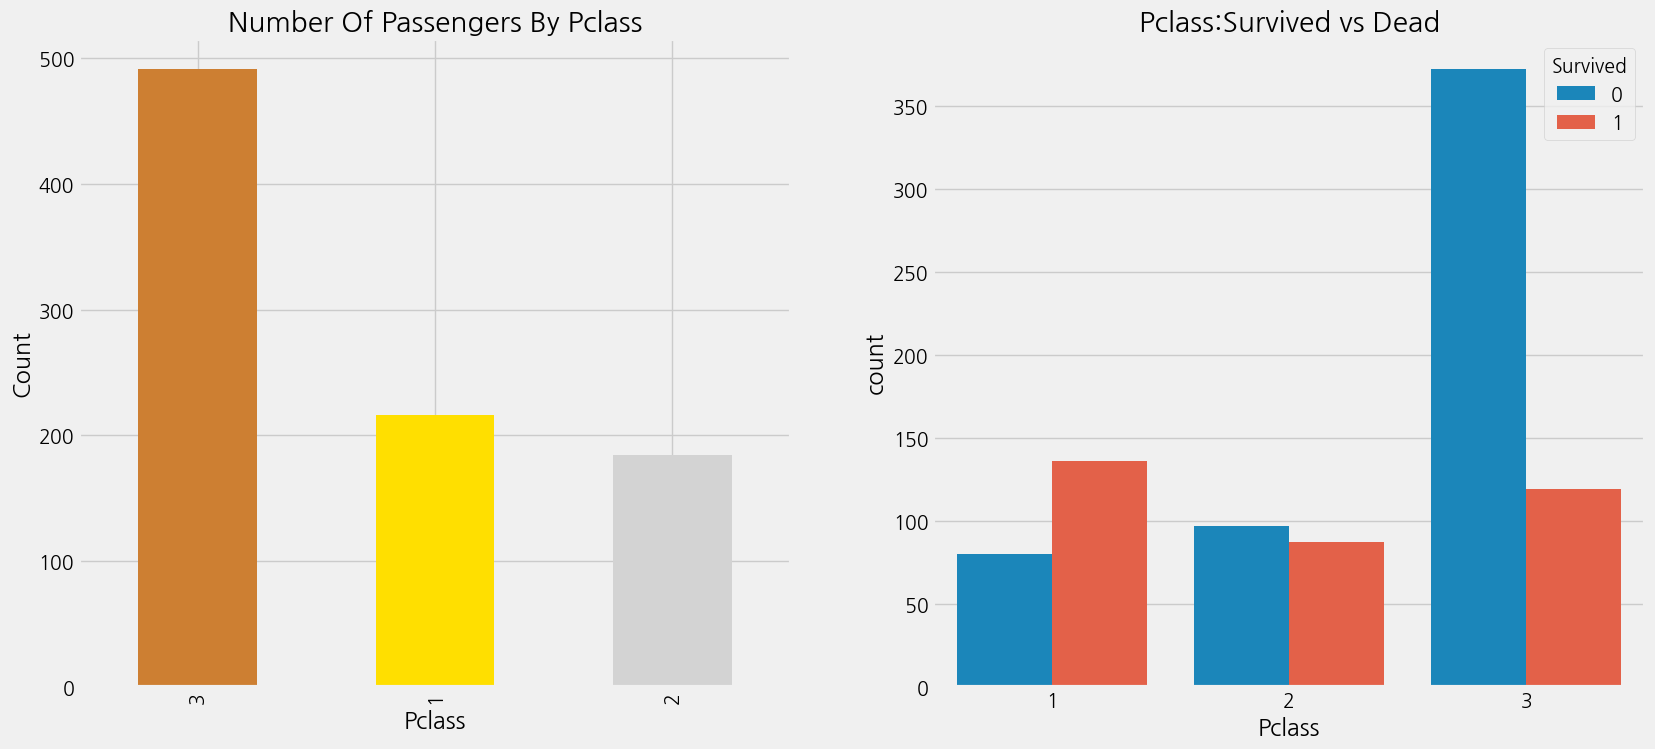

In [116]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x = 'Pclass',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [117]:
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

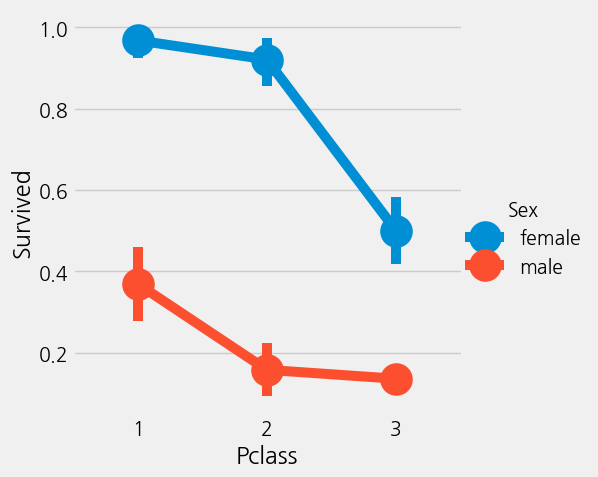

In [120]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=df)
plt.show()

In [161]:
survived_df = df[['Sex','Survived']].groupby(['Sex']).sum()
survived_df.columns = ["count"]
missing_df = df[['Sex','PassengerId']].groupby(['Sex']).count()
missing_df.columns = ["count"]

missing_df = missing_df - survived_df

missing_df["count"]

Sex
female     81
male      468
Name: count, dtype: int64

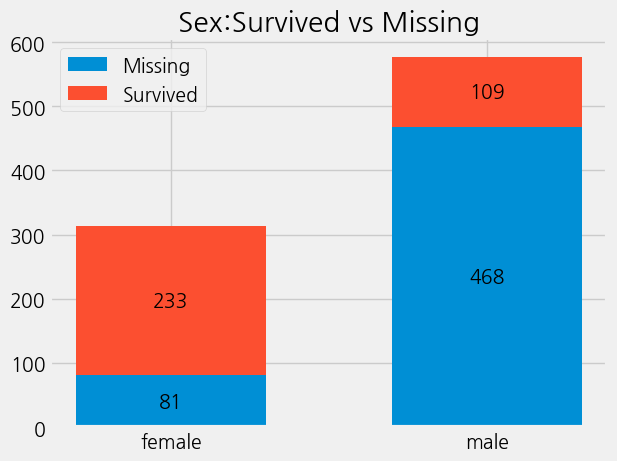

In [165]:
species = ('female', 'male')
sex_counts = {
    "Missing":missing_df["count"].to_numpy(),
    "Survived":survived_df["count"].to_numpy()
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(2)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, 0.6, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

ax.set_title('Sex:Survived vs Missing')
ax.legend()

plt.show()